In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.regularizers import l2

from functools import partial

from data.data_generator import data_generator, data_model
from data.data_filtering import sanity_checks

from utils.viz import plot_estimation_scatter, plot_est_scatter, plot_true_est_scatter
from utils.losses import mse, heteroskedastic_loss

In [2]:
%load_ext autoreload
%autoreload 2

### Generating and preprocessing data

In [3]:
# Prepare the training dataset
n_data = 10500
data = data_generator(batch_size=n_data)

# Preprocessing dataset
x = np.array(data['x'])
theta = np.array(data['theta'])

In [4]:
print(x.shape)
print(type(x))
print(theta.shape)
print(type(theta))

(10500, 100, 5)
<class 'numpy.ndarray'>
(10500, 5)
<class 'numpy.ndarray'>


In [5]:
# Sanity checks
x, theta = sanity_checks(x, theta)

# Sanity checks for numerical stability
assert(np.sum(x == np.inf) == 0)
assert(np.sum(x == -np.inf) == 0)
assert(np.sum(x == np.nan) == 0)

In [6]:
print(x.shape)
print(theta.shape)

(10500, 500)
(10500, 5)


In [7]:
# Prepare training and test set
x_train = x[:-500]
y_train = theta[:-500]

x_test = x[-500:]
y_test = theta[-500:]

In [8]:
print(x_train.shape)

(10000, 500)


### Hyperparameters

In [9]:
t_max = 100
dt = 1
t = np.linspace(0, t_max, int(t_max / dt) + 1)
N = 10000
initial_values = 1 - 1 / N, 1 / N, 0, 0, 0

In [10]:
batch_size = 64
epochs = 200

meta = {
    'n_units': [192, 192, 192],
    'activation': 'elu',
    'w_decay': 0.0,
    'initializer': 'glorot_uniform'
}

In [11]:
# Heteroskedastic Model
heteroskedastic_model = tf.keras.Sequential(
    [tf.keras.layers.Dense(
    units,
    activation=meta['activation'],
    kernel_initializer=meta['initializer'],
    kernel_regularizer=l2(meta['w_decay']))
    for units in meta['n_units']] +

    [tf.keras.layers.Dense(10,
                           kernel_initializer=meta['initializer'],
                           kernel_regularizer=l2(meta['w_decay']))]
    )

heteroskedastic_model.compile(
    optimizer='adam',
    loss=heteroskedastic_loss
)

heteroskedastic_model.fit(
    x_train, 
    y_train,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/200
157/157 [==============================] - 1s 1ms/step - loss: -3.9325
Epoch 2/200
157/157 [==============================] - 0s 1ms/step - loss: -6.7622
Epoch 3/200
157/157 [==============================] - 0s 1ms/step - loss: -5.2937
Epoch 4/200
157/157 [==============================] - 0s 1ms/step - loss: -6.0631
Epoch 5/200
157/157 [==============================] - 0s 1ms/step - loss: -7.5500
Epoch 6/200
157/157 [==============================] - 0s 1ms/step - loss: -6.6506
Epoch 7/200
157/157 [==============================] - 0s 1ms/step - loss: -6.0178
Epoch 8/200
157/157 [==============================] - 0s 1ms/step - loss: -8.0704
Epoch 9/200
157/157 [==============================] - 0s 1ms/step - loss: -8.1318
Epoch 10/200
157/157 [==============================] - 0s 1ms/step - loss: -8.9051
Epoch 11/200
157/157 [==============================] - 0s 1ms/step - loss: -8.5557
Epoch 12/200
157/157 [==============================] - 0s 1ms/step - loss: -8.5112
E

157/157 [==============================] - 0s 1ms/step - loss: -10.6393
Epoch 99/200
157/157 [==============================] - 0s 1ms/step - loss: -10.8834
Epoch 100/200
157/157 [==============================] - 0s 1ms/step - loss: -11.5201
Epoch 101/200
157/157 [==============================] - 0s 1ms/step - loss: -11.6000
Epoch 102/200
157/157 [==============================] - 0s 1ms/step - loss: -12.5545
Epoch 103/200
157/157 [==============================] - 0s 1ms/step - loss: -11.8110
Epoch 104/200
157/157 [==============================] - 0s 1ms/step - loss: -8.5341
Epoch 105/200
157/157 [==============================] - 0s 1ms/step - loss: -11.6137
Epoch 106/200
157/157 [==============================] - 0s 1ms/step - loss: -11.3785
Epoch 107/200
157/157 [==============================] - 0s 1ms/step - loss: -11.6054
Epoch 108/200
157/157 [==============================] - 0s 1ms/step - loss: -12.2192
Epoch 109/200
157/157 [==============================] - 0s 1ms/step -

157/157 [==============================] - 0s 1ms/step - loss: -11.4327
Epoch 194/200
157/157 [==============================] - 0s 1ms/step - loss: -12.5349
Epoch 195/200
157/157 [==============================] - 0s 1ms/step - loss: -12.9899
Epoch 196/200
157/157 [==============================] - 0s 1ms/step - loss: -12.0526
Epoch 197/200
157/157 [==============================] - 0s 1ms/step - loss: -11.8525
Epoch 198/200
157/157 [==============================] - 0s 1ms/step - loss: -12.2813
Epoch 199/200
157/157 [==============================] - 0s 1ms/step - loss: -12.5221
Epoch 200/200
157/157 [==============================] - 0s 1ms/step - loss: -12.7627


In [12]:
# MSE Model
mse_model = tf.keras.Sequential(
[tf.keras.layers.Dense(
    units,
    activation=meta['activation'],
    kernel_initializer=meta['initializer'],
    kernel_regularizer=l2(meta['w_decay']))
    for units in meta['n_units']] +

[tf.keras.layers.Dense(5,
                       kernel_initializer=meta['initializer'],
                       kernel_regularizer=l2(meta['w_decay']))]
)

mse_model.compile(
    optimizer='adam',
    loss=mse
)

mse_model.fit(
    x_train, 
    y_train,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/200
157/157 [==============================] - 1s 1ms/step - loss: 0.0977
Epoch 2/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 3/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 4/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 5/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 6/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 7/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 8/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 9/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 10/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 11/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 12/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 13/200


157/157 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 100/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 101/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 102/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 103/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 104/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 105/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 106/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 107/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 108/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 109/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 110/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 

157/157 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 197/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 198/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 199/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 200/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0085


### Predict

In [13]:
# MSE Model
prediction = mse_model.predict(x_test)

# Heteroskedastic Model
pred = heteroskedastic_model.predict(x_test)
pred_means, pred_logvar = tf.split(heteroskedastic_model.predict(x_test), 2, axis=-1)

pred_var = tf.exp(pred_logvar)

In [14]:
print(pred.shape)

(500, 10)


In [14]:
parameters = [r'$\beta$', r'$\alpha$', r'$\gamma$', r'$\delta$', r'$\rho$']
compartments = [r'Susceptibles', r'Exposed', r'Infected', r'Recovered', r'Dead']

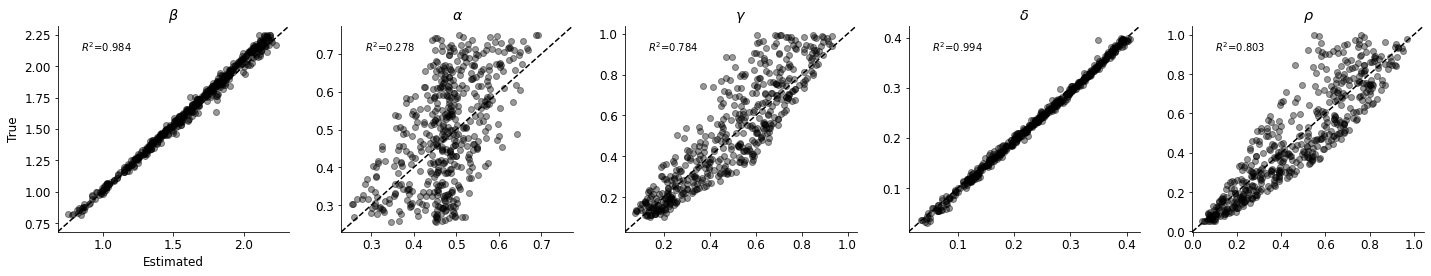

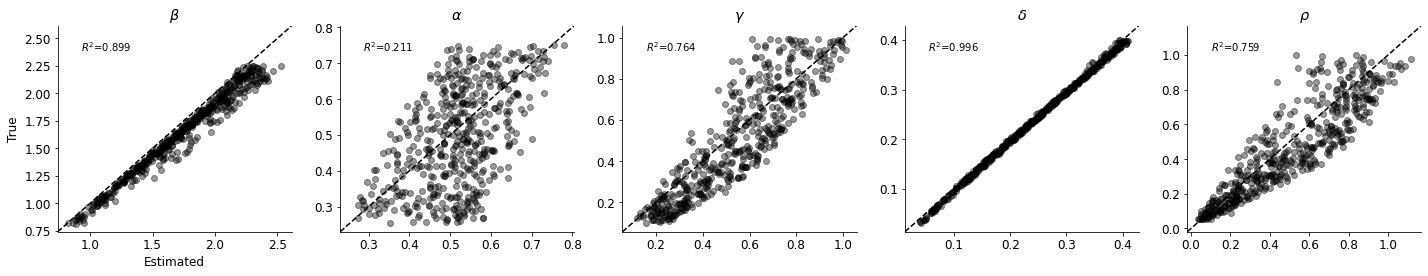

In [15]:
# Utils
# plot_estimation_scatter(y_test, prediction, parameters)
plot_true_est_scatter(prediction, y_test, parameters)
# plot_est_scatter(y_test, pred_means, pred_var, parameters)
plot_true_est_scatter(pred_means, y_test, parameters)